In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [48]:
data = pd.read_csv('London Property Listings Dataset.csv')

In [49]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Postcode,Area,Price_Category,Area_Avg_Price
0,330000.0,Apartment,1.0,1.0,518.0,E14,Eastern,Low,1.001684e+06
1,340000.0,Flat,1.0,1.0,1.0,E14,Eastern,Low,1.001684e+06
2,340000.0,Apartment,1.0,1.0,2.0,E14,Eastern,Low,1.001684e+06
3,340000.0,Flat,1.0,1.0,1.0,E14,Eastern,Low,1.001684e+06
4,340000.0,Flat,1.0,1.0,388.0,SW20,South Western,Low,1.516724e+06


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           29537 non-null  float64
 1   Property Type   29537 non-null  object 
 2   Bedrooms        29537 non-null  float64
 3   Bathrooms       29537 non-null  float64
 4   Size            29537 non-null  float64
 5   Postcode        29537 non-null  object 
 6   Area            29537 non-null  object 
 7   Price_Category  29537 non-null  object 
 8   Area_Avg_Price  29537 non-null  float64
dtypes: float64(5), object(4)
memory usage: 2.0+ MB


In [87]:
data = data.drop(['Postcode', 'Price_Category','Area_Avg_Price'], axis=1, errors='ignore')

In [88]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area
13,340000.0,Apartment,2.0,1.0,680.0,Eastern
24,340000.0,Flat,3.0,1.0,738.0,South Eastern
30,340000.0,Apartment,2.0,2.0,775.0,Eastern
38,340000.0,Flat,3.0,1.0,936.0,Eastern
39,340000.0,Flat,3.0,1.0,673.0,Eastern


In [89]:
data.isnull().sum()

Price            0
Property Type    0
Bedrooms         0
Bathrooms        0
Size             0
Area             0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

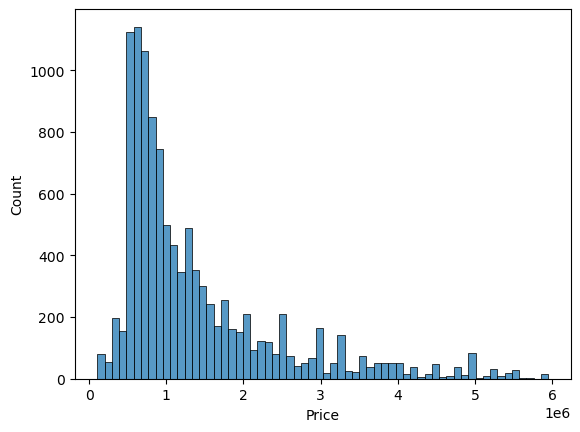

In [90]:
sns.histplot(data=data, x='Price')

In [55]:
data.duplicated().sum()

7508

In [56]:
data = data.drop_duplicates()

In [57]:
data.duplicated().sum()

0

<Axes: xlabel='Property Type'>

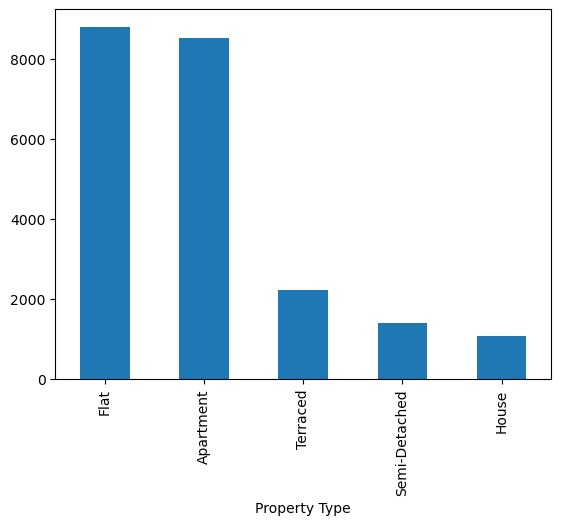

In [58]:
data['Property Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Area'>

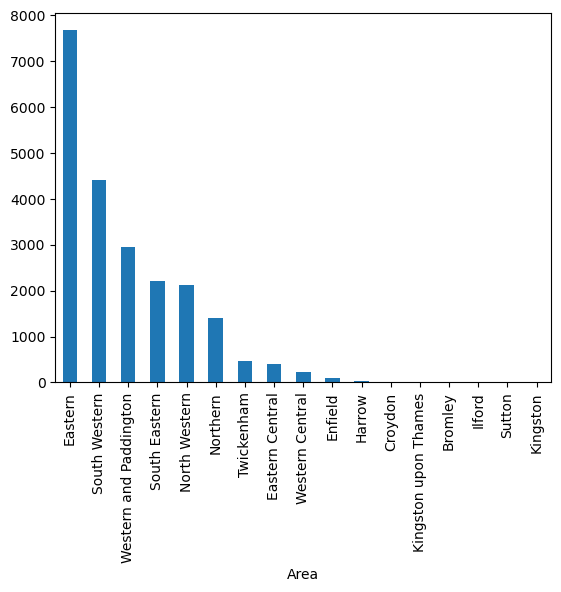

In [59]:
data['Area'].value_counts().plot(kind='bar')

<Axes: xlabel='Area'>

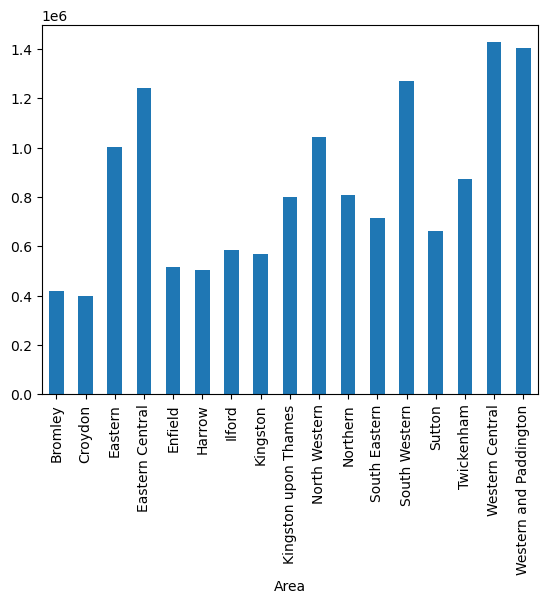

In [60]:
data.groupby('Area')['Price'].mean().plot(kind='bar')

<Axes: xlabel='Bedrooms', ylabel='Price'>

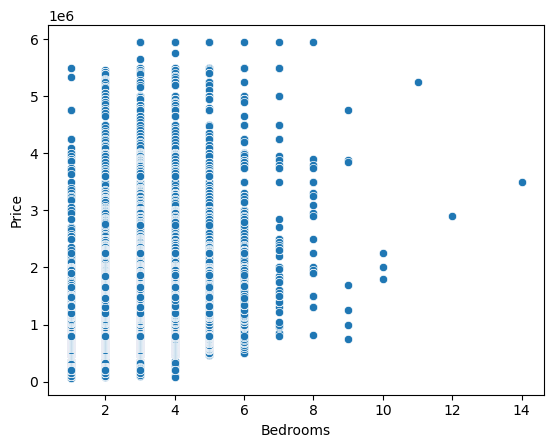

In [61]:
#if relationship between bedrooms and average price
sns.scatterplot(data=data,x='Bedrooms',y='Price')

In [62]:
data['Bedrooms'].corr(data['Price'])

0.4428048557532103

In [63]:
#Size, bathrooms effect price

(array([2.2027e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000000e+00, 1.5000090e+05, 3.0000080e+05, 4.5000070e+05,
        6.0000060e+05, 7.5000050e+05, 9.0000040e+05, 1.0500003e+06,
        1.2000002e+06, 1.3500001e+06, 1.5000000e+06]),
 <BarContainer object of 10 artists>)

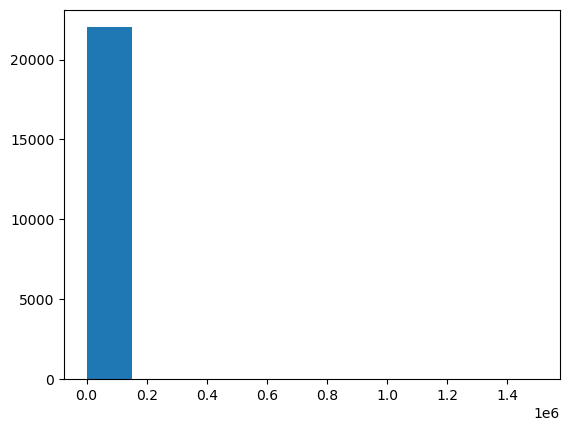

In [64]:
#Distribution of size
plt.hist(data=data,x='Size')

In [65]:
data['Size'].describe()

count    2.202900e+04
mean     8.143055e+02
std      1.020657e+04
min      1.000000e+00
25%      2.000000e+00
50%      6.680000e+02
75%      1.009000e+03
max      1.500000e+06
Name: Size, dtype: float64

In [66]:
data['Size'].median()

668.0

In [73]:
data = data[data['Size'] > data['Size'].median()]

In [74]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area,Area_Avg_Price
13,340000.0,Apartment,2.0,1.0,680.0,Eastern,1.001684e+06
24,340000.0,Flat,3.0,1.0,738.0,South Eastern,6.921048e+05
30,340000.0,Apartment,2.0,2.0,775.0,Eastern,1.001684e+06
38,340000.0,Flat,3.0,1.0,936.0,Eastern,1.001684e+06
39,340000.0,Flat,3.0,1.0,673.0,Eastern,1.001684e+06


In [75]:
data['Size'].max()

1500000.0

<Axes: xlabel='Size', ylabel='Count'>

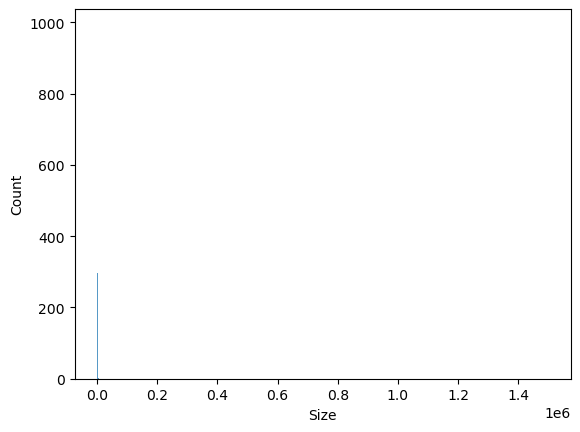

In [76]:
sns.histplot(data=data,x='Size')

In [78]:
data[data['Size'] > 10000]

,Price,Property Type,Bedrooms,Bathrooms,Size,Area,Area_Avg_Price
3713,325000.0,Flat,1.0,1.0,53798.0,Eastern,1.001684e+06
8461,525000.0,Flat,2.0,2.0,11926.0,South Eastern,6.921048e+05
10874,599950.0,Flat,2.0,2.0,11550.0,Eastern,1.001684e+06
11553,800000.0,Flat,3.0,1.0,12152.0,Eastern,1.001684e+06
11956,830000.0,Apartment,1.0,1.0,78797.0,South Western,1.516724e+06
14626,1000000.0,Flat,3.0,3.0,13423.0,Northern,8.312952e+05
16831,1195000.0,Apartment,3.0,2.0,15710.0,North Western,1.237283e+06
16885,1195000.0,Flat,3.0,2.0,11098.0,North Western,1.237283e+06
17938,1400000.0,Apartment,3.0,3.0,12000.0,Western and Paddington,1.706839e+06
18071,1350000.0,Terraced,5.0,2.0,19569.0,South Eastern,6.921048e+05


In [79]:
data = data[data['Size'] < 10000]

In [80]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area,Area_Avg_Price
13,340000.0,Apartment,2.0,1.0,680.0,Eastern,1.001684e+06
24,340000.0,Flat,3.0,1.0,738.0,South Eastern,6.921048e+05
30,340000.0,Apartment,2.0,2.0,775.0,Eastern,1.001684e+06
38,340000.0,Flat,3.0,1.0,936.0,Eastern,1.001684e+06
39,340000.0,Flat,3.0,1.0,673.0,Eastern,1.001684e+06


<Axes: xlabel='Size', ylabel='Count'>

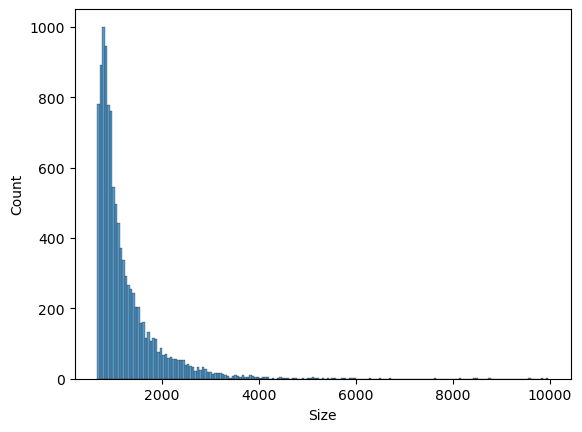

In [81]:
sns.histplot(data=data,x='Size')

<Axes: xlabel='Size', ylabel='Price'>

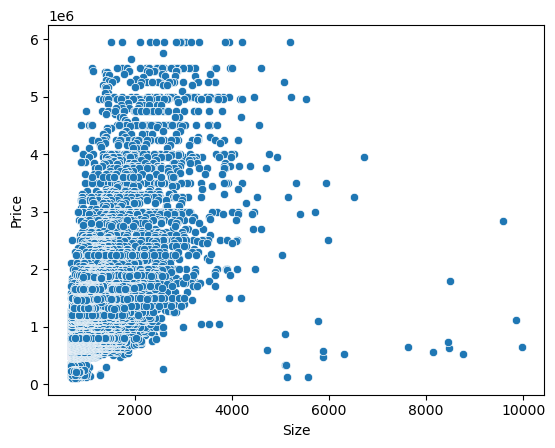

In [82]:
#if size impacts the price 
sns.scatterplot(data=data,x='Size',y='Price')

In [83]:
data['Size'].corr(data['Price'])

0.6128604701867957

<Axes: xlabel='Bathrooms', ylabel='Price'>

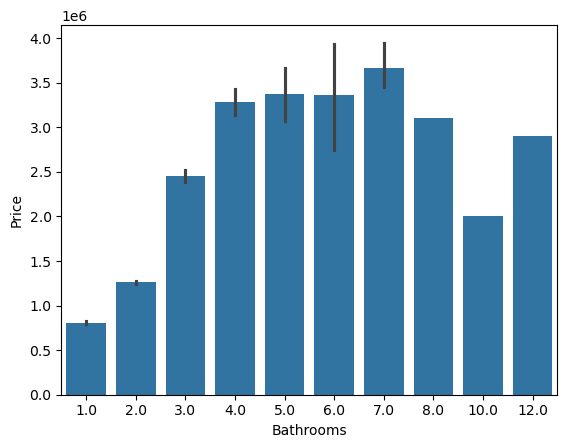

In [85]:
#Impact of number of bathrooms on price
sns.barplot(data=data,x='Bathrooms',y='Price')

In [91]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area
13,340000.0,Apartment,2.0,1.0,680.0,Eastern
24,340000.0,Flat,3.0,1.0,738.0,South Eastern
30,340000.0,Apartment,2.0,2.0,775.0,Eastern
38,340000.0,Flat,3.0,1.0,936.0,Eastern
39,340000.0,Flat,3.0,1.0,673.0,Eastern


<Axes: xlabel='Price', ylabel='Count'>

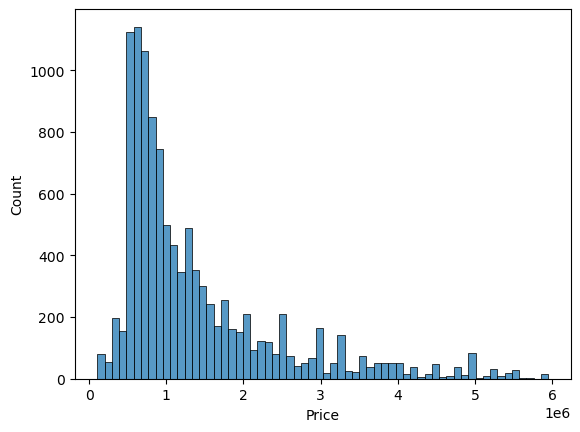

In [92]:
sns.histplot(data=data,x='Price')

In [94]:
oe = OrdinalEncoder()

oe.fit(data[['Property Type','Area']])

OrdinalEncoder()

In [93]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area
13,340000.0,Apartment,2.0,1.0,680.0,Eastern
24,340000.0,Flat,3.0,1.0,738.0,South Eastern
30,340000.0,Apartment,2.0,2.0,775.0,Eastern
38,340000.0,Flat,3.0,1.0,936.0,Eastern
39,340000.0,Flat,3.0,1.0,673.0,Eastern


In [95]:
oe.categories_

[array(['Apartment', 'Flat', 'House', 'Semi-Detached', 'Terraced'],
       dtype=object),
 array(['Bromley', 'Croydon', 'Eastern', 'Eastern Central', 'Enfield',
        'Harrow', 'Ilford', 'Kingston', 'Kingston upon Thames',
        'North Western', 'Northern', 'South Eastern', 'South Western',
        'Sutton', 'Twickenham', 'Western Central',
        'Western and Paddington'], dtype=object)]

In [96]:
data[['Property Type','Area']] = oe.transform(data[['Property Type','Area']])

In [97]:
data

,Price,Property Type,Bedrooms,Bathrooms,Size,Area
13,340000.0,0.0,2.0,1.0,680.0,2.0
24,340000.0,1.0,3.0,1.0,738.0,11.0
30,340000.0,0.0,2.0,2.0,775.0,2.0
38,340000.0,1.0,3.0,1.0,936.0,2.0
39,340000.0,1.0,3.0,1.0,673.0,2.0
...,...,...,...,...,...,...
29529,795000.0,1.0,2.0,1.0,697.0,12.0
29530,795000.0,0.0,2.0,2.0,941.0,11.0
29532,795000.0,1.0,3.0,2.0,840.0,12.0
29534,795000.0,1.0,2.0,2.0,753.0,11.0


In [98]:
oe.inverse_transform(data[['Property Type','Area']])

array([['Apartment', 'Eastern'],
       ['Flat', 'South Eastern'],
       ['Apartment', 'Eastern'],
       ...,
       ['Flat', 'South Western'],
       ['Flat', 'South Eastern'],
       ['Flat', 'South Western']], dtype=object)

In [105]:
X = data.iloc[:, 1:]
Y = data[['Price']]

In [109]:
X = X.reset_index(drop=True)

In [110]:
#Scaling - Ignore cat columns for scaling
X_scaller = StandardScaler()
Y_scaller = StandardScaler()

X_scalled = pd.DataFrame(X_scaller.fit_transform(X[['Bedrooms','Bathrooms','Size']]), columns=['Bedrooms','Bathrooms','Size'])
X_scalled

,Bedrooms,Bathrooms,Size
0,-0.615614,-1.252575,-0.844528
1,0.338623,-1.252575,-0.755799
2,-0.615614,0.038886,-0.699195
3,0.338623,-1.252575,-0.452894
4,0.338623,-1.252575,-0.855237
...,...,...,...
10988,-0.615614,-1.252575,-0.818521
10989,-0.615614,0.038886,-0.445245
10990,0.338623,0.038886,-0.599757
10991,-0.615614,0.038886,-0.732851


In [111]:
X_scalled['Area'] = X['Area']

In [112]:
X_scalled['Property Type'] = X['Property Type']

In [113]:
X_scalled

,Bedrooms,Bathrooms,Size,Area,Property Type
0,-0.615614,-1.252575,-0.844528,2.0,0.0
1,0.338623,-1.252575,-0.755799,11.0,1.0
2,-0.615614,0.038886,-0.699195,2.0,0.0
3,0.338623,-1.252575,-0.452894,2.0,1.0
4,0.338623,-1.252575,-0.855237,2.0,1.0
...,...,...,...,...,...
10988,-0.615614,-1.252575,-0.818521,12.0,1.0
10989,-0.615614,0.038886,-0.445245,11.0,0.0
10990,0.338623,0.038886,-0.599757,12.0,1.0
10991,-0.615614,0.038886,-0.732851,11.0,1.0


In [114]:
X

,Property Type,Bedrooms,Bathrooms,Size,Area
0,0.0,2.0,1.0,680.0,2.0
1,1.0,3.0,1.0,738.0,11.0
2,0.0,2.0,2.0,775.0,2.0
3,1.0,3.0,1.0,936.0,2.0
4,1.0,3.0,1.0,673.0,2.0
...,...,...,...,...,...
10988,1.0,2.0,1.0,697.0,12.0
10989,0.0,2.0,2.0,941.0,11.0
10990,1.0,3.0,2.0,840.0,12.0
10991,1.0,2.0,2.0,753.0,11.0


In [115]:
Y_scalled = Y_scaller.fit_transform(Y)

In [116]:
Y_scalled

array([[-0.9859607 ],
       [-0.9859607 ],
       [-0.9859607 ],
       ...,
       [-0.55419579],
       [-0.55419579],
       [-0.55419579]])

In [117]:
#Split the data into train and test
X_train, X_test, Y_train,Y_test = train_test_split(X_scalled,Y_scalled, test_size=0.2,random_state=23)

In [118]:
X_train.shape

(8794, 5)

In [119]:
Y_train.shape

(8794, 1)

In [120]:
#fit
model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [121]:
predictions_test = model.predict(X_test)

In [122]:
predictions_test

array([[-0.4075826 ],
       [-0.53095168],
       [-0.3391948 ],
       ...,
       [ 1.13237787],
       [-0.8575071 ],
       [-0.26029753]])

In [123]:
Y_test

array([[-0.54945112],
       [-0.35966435],
       [-0.66806786],
       ...,
       [ 1.15862985],
       [-0.7392379 ],
       [-0.35624819]])

In [124]:
mse = mean_squared_error(Y_test, predictions_test)
mse

0.5646069964767885

In [125]:
X

,Property Type,Bedrooms,Bathrooms,Size,Area
0,0.0,2.0,1.0,680.0,2.0
1,1.0,3.0,1.0,738.0,11.0
2,0.0,2.0,2.0,775.0,2.0
3,1.0,3.0,1.0,936.0,2.0
4,1.0,3.0,1.0,673.0,2.0
...,...,...,...,...,...
10988,1.0,2.0,1.0,697.0,12.0
10989,0.0,2.0,2.0,941.0,11.0
10990,1.0,3.0,2.0,840.0,12.0
10991,1.0,2.0,2.0,753.0,11.0


In [126]:
model.coef_

array([[-0.13162445,  0.29861295,  0.54964125,  0.0194731 , -0.05751557]])

In [127]:
model.intercept_

array([-0.11052339])

In [128]:
data.head()

,Price,Property Type,Bedrooms,Bathrooms,Size,Area
13,340000.0,0.0,2.0,1.0,680.0,2.0
24,340000.0,1.0,3.0,1.0,738.0,11.0
30,340000.0,0.0,2.0,2.0,775.0,2.0
38,340000.0,1.0,3.0,1.0,936.0,2.0
39,340000.0,1.0,3.0,1.0,673.0,2.0


In [129]:
variance = np.var(Y_test)
print(f"MSE: {mse}")
print(f"Variance of Y_test: {variance}")

MSE: 0.5646069964767885
Variance of Y_test: 0.99254315828826


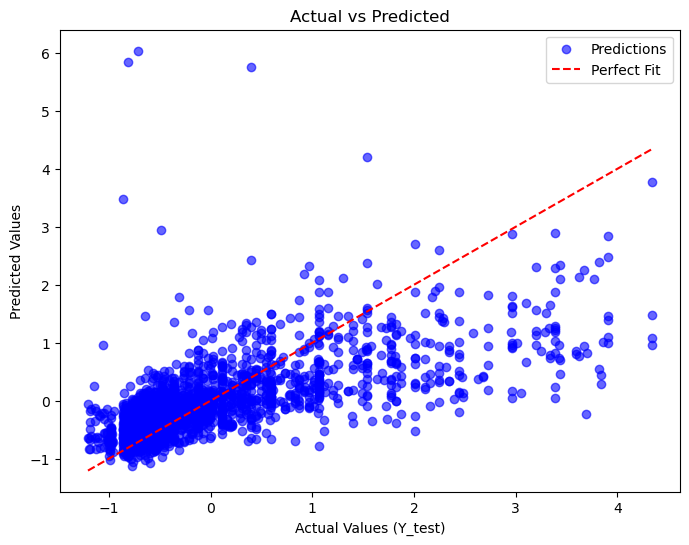

In [130]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions_test, alpha=0.6, color='blue', label='Predictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Fit')  # Ideal line
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [131]:
# Flatten the arrays
Y_test_flat = Y_test.ravel()  # Convert (5908, 1) to (5908,)
predictions_test_flat = predictions_test.ravel()

# Create the DataFrame
results = pd.DataFrame({
    'Actual Values': Y_test_flat,
    'Predicted Values': predictions_test_flat
})

# Display the first few rows
print(results.head(10))

   Actual Values  Predicted Values
0      -0.549451         -0.407583
1      -0.359664         -0.530952
2      -0.668068         -0.339195
3       1.727990          1.054312
4       0.290355         -0.033441
5      -0.976471         -0.468989
6      -0.720259         -0.168117
7      -0.217324          0.338871
8      -0.174622         -0.667350
9      -0.269516          0.096442


In [132]:
print(Y_test.shape)
print(predictions_test.shape)

(2199, 1)
(2199, 1)


In [133]:
data.info

<bound method DataFrame.info of           Price  Property Type  Bedrooms  Bathrooms   Size  Area
13     340000.0            0.0       2.0        1.0  680.0   2.0
24     340000.0            1.0       3.0        1.0  738.0  11.0
30     340000.0            0.0       2.0        2.0  775.0   2.0
38     340000.0            1.0       3.0        1.0  936.0   2.0
39     340000.0            1.0       3.0        1.0  673.0   2.0
...         ...            ...       ...        ...    ...   ...
29529  795000.0            1.0       2.0        1.0  697.0  12.0
29530  795000.0            0.0       2.0        2.0  941.0  11.0
29532  795000.0            1.0       3.0        2.0  840.0  12.0
29534  795000.0            1.0       2.0        2.0  753.0  11.0
29535  795000.0            1.0       2.0        2.0  980.0  12.0

[10993 rows x 6 columns]>

## Lasso model

In [135]:
model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [137]:
predictions_test_lasso = model_lasso.predict(X_test)
predictions_test_lasso

array([-0.36689159, -0.42177427, -0.32746994, ...,  0.90373894,
       -0.56642515, -0.27249945])

In [139]:
Y_test

array([[-0.54945112],
       [-0.35966435],
       [-0.66806786],
       ...,
       [ 1.15862985],
       [-0.7392379 ],
       [-0.35624819]])

In [143]:
mse_lasso = mean_squared_error(Y_test, predictions_test_lasso)
mse_lasso

0.5943168876933005

## SVM model

In [145]:
SVM_model = svm.SVR()
SVM_model.fit(X_train, Y_train)

/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [146]:
predictions_SVM_model = SVM_model.predict(X_test)
predictions_SVM_model

array([-0.3515231 , -0.59335183, -0.54031216, ...,  1.08128821,
       -0.80451984, -0.70303777])

In [147]:
Y_test

array([[-0.54945112],
       [-0.35966435],
       [-0.66806786],
       ...,
       [ 1.15862985],
       [-0.7392379 ],
       [-0.35624819]])

In [148]:
mse_SVM_model = mean_squared_error(Y_test, predictions_SVM_model)
mse_SVM_model

0.43681494324089154

## Tree regression

In [150]:
Tree_model = tree.DecisionTreeRegressor()
Tree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [151]:
Tree_regression_predictions = Tree_model.predict(X_test)
Tree_regression_predictions 

array([-0.78668459, -0.27663263, -0.76296124, ...,  0.0199092 ,
       -0.6301105 , -1.0915296 ])

In [152]:
mse_Tree_regression = mean_squared_error(Y_test, Tree_regression_predictions)
mse_Tree_regression

0.7199205006516555

## RandomForestRegressor

In [156]:
RandomForest_model = RandomForestRegressor(n_estimators=10)
RandomForest_model.fit(X_train, Y_train)

/opt/miniconda3/envs/P1/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10)

In [157]:
RandomForest_model_predictions = RandomForest_model.predict(X_test)
RandomForest_model_predictions

array([-0.5641596 , -0.30620774, -0.36032955, ...,  0.90953471,
       -0.73069749, -0.47988241])

In [158]:
mse_RandomForest_model = mean_squared_error(Y_test,RandomForest_model_predictions)
mse_RandomForest_model

0.46210878608915024

In [159]:
mse_RandomForest_model - mse_SVM_model

0.025293842848258696